In [1]:
# Imports
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
# Load your merged dataset into a Pandas DataFrame
# Replace 'merged_data.csv' with the actual file path or URL of your dataset
merged_data = pd.read_csv('./CleanData/Set2/MergedDataSet2.csv')
print(merged_data)

     UnixTimeStampInMsec             Datetime  Latitude  Longitude  Speed  \
0          1683670042000  2023-05-09 22:07:22   53.9431    10.8564   0.10   
1          1683670254000  2023-05-09 22:10:54   53.9431    10.8565   0.03   
2          1683670255000  2023-05-09 22:10:55   53.9431    10.8565   0.12   
3          1683670547000  2023-05-09 22:15:47   53.9432    10.8564   0.17   
4          1683670548000  2023-05-09 22:15:48   53.9432    10.8564   0.51   
..                   ...                  ...       ...        ...    ...   
783        1683755761000  2023-05-10 21:56:01   53.8352    10.5098   0.24   
784        1683755772000  2023-05-10 21:56:12   53.8352    10.5099   0.10   
785        1683755849000  2023-05-10 21:57:29   53.8352    10.5099   0.09   
786        1683755860000  2023-05-10 21:57:40   53.8352    10.5099   0.72   
787        1683755973000  2023-05-10 21:59:33   53.8353    10.5099   0.16   

     TrackAngle    AccelX    AccelY    AccelZ     GyroX     GyroY     GyroZ

In [3]:
# Define the state transition matrix (A) and observation matrix (H) for Latitude and Longitude
A = np.eye(2)  # Identity matrix for position tracking
H = np.array([[1, 0], [0, 1]])  # Observation matrix for Latitude and Longitude

# Initialize the Kalman Filter
kf = KalmanFilter(
    initial_state_mean=merged_data[['Latitude', 'Longitude']].iloc[0],  # Initial position
    initial_state_covariance=np.eye(2),  # Initial covariance matrix
    transition_matrices=A,
    observation_matrices=H
)

# Apply the Kalman Filter to the dataset
filtered_state_means, _ = kf.filter(merged_data[['Latitude', 'Longitude']].values)

# Update the Latitude and Longitude columns in the DataFrame with the filtered values
merged_data['Latitude'] = filtered_state_means[:, 0]
merged_data['Longitude'] = filtered_state_means[:, 1]

merged_and_filtered_data = merged_data
print(merged_and_filtered_data)


     UnixTimeStampInMsec             Datetime   Latitude  Longitude  Speed  \
0          1683670042000  2023-05-09 22:07:22  53.943100  10.856400   0.10   
1          1683670254000  2023-05-09 22:10:54  53.943100  10.856460   0.03   
2          1683670255000  2023-05-09 22:10:55  53.943100  10.856485   0.12   
3          1683670547000  2023-05-09 22:15:47  53.943162  10.856432   0.17   
4          1683670548000  2023-05-09 22:15:48  53.943185  10.856412   0.51   
..                   ...                  ...        ...        ...    ...   
783        1683755761000  2023-05-10 21:56:01  53.835200  10.509801   0.24   
784        1683755772000  2023-05-10 21:56:12  53.835200  10.509862   0.10   
785        1683755849000  2023-05-10 21:57:29  53.835200  10.509885   0.09   
786        1683755860000  2023-05-10 21:57:40  53.835200  10.509894   0.72   
787        1683755973000  2023-05-10 21:59:33  53.835262  10.509898   0.16   

     TrackAngle    AccelX    AccelY    AccelZ     GyroX     Gyr

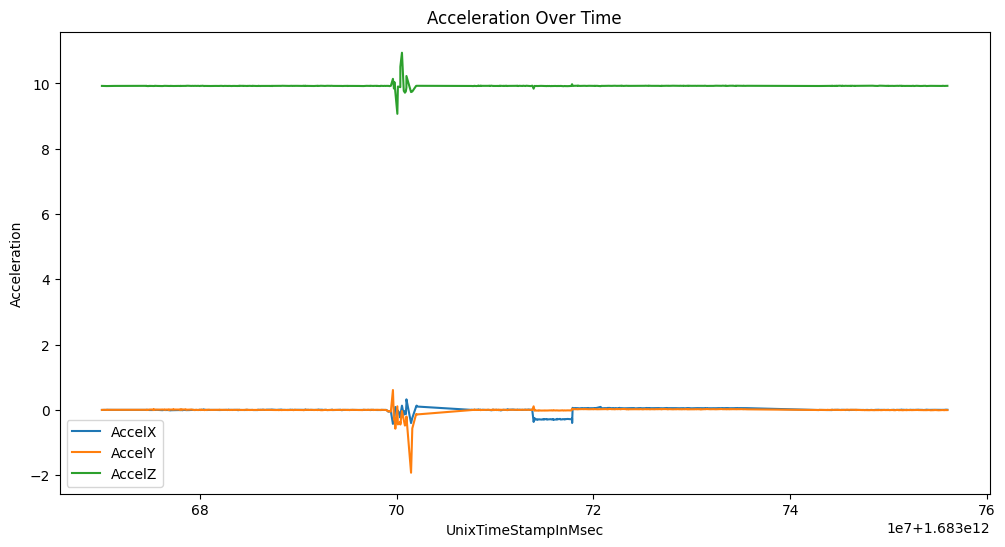

In [4]:

# Data Visualization
# Plot time series data of shock and GPS parameters
plt.figure(figsize=(12, 6))
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelX'], label='AccelX')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelY'], label='AccelY')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelZ'], label='AccelZ')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Acceleration')
plt.title('Acceleration Over Time')
plt.legend()
plt.show()


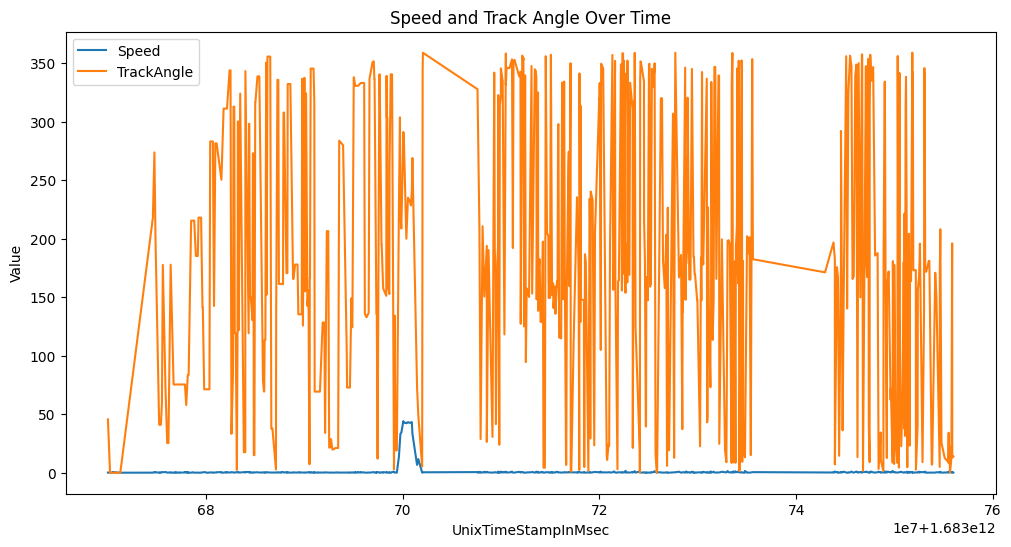

In [5]:
# Plot speed and track angle
plt.figure(figsize=(12, 6))
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['Speed'], label='Speed')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['TrackAngle'], label='TrackAngle')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Value')
plt.title('Speed and Track Angle Over Time')
plt.legend()
plt.show()

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

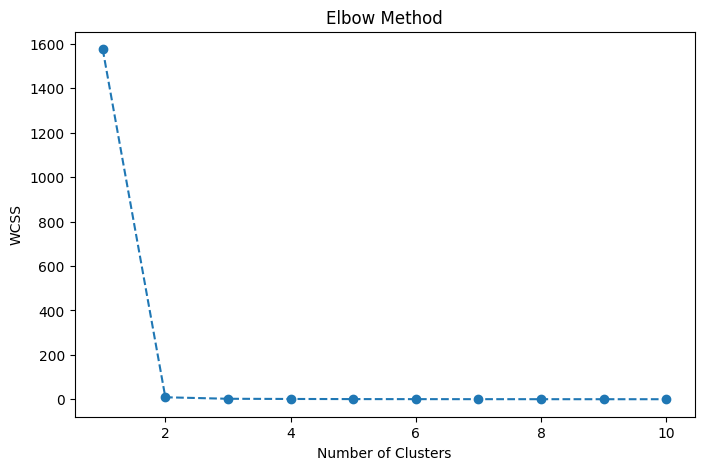

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


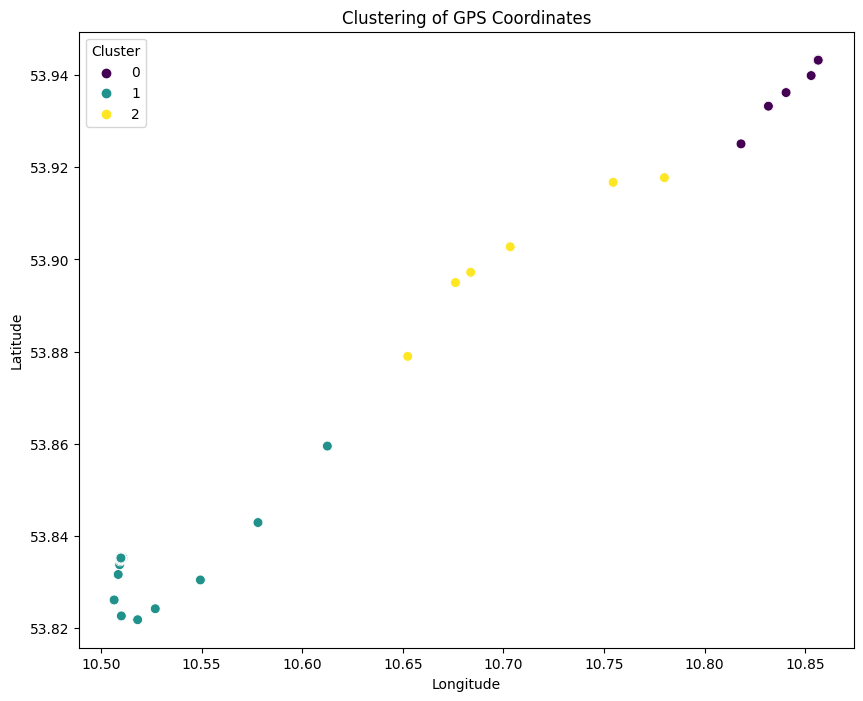

In [6]:
# Perform K-means clustering on data (Latitude and Longitude)
clustered_data = merged_and_filtered_data[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
merged_gps_data_scaled = scaler.fit_transform(clustered_data)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(merged_gps_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters and fit the K-means model
num_clusters = 3  # You can adjust this based on the Elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
merged_and_filtered_data['Cluster'] = kmeans.fit_predict(merged_gps_data_scaled)

# Visualize the clusters on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=merged_and_filtered_data, palette='viridis', s=50)
plt.title('Clustering of GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
